In [3]:
import h5py
import glob
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
from sklearn.metrics import auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

In [5]:
files1 = glob.glob("/global/u1/b/bbbam/13_channel_tau_classifier_ResNet_3/INFERENCE_DATA/*")
print(files1[0])
# files2 = glob.glob("/home/bbbam/boosted_tau_classifier_13ch/INFERENCE_DATA/*/*")
# print(len(files1),len(files2))
# print(files1[-1],files2[-1])

/global/u1/b/bbbam/13_channel_tau_classifier_ResNet_3/INFERENCE_DATA/metrics_epoch24_auc0.9684.hdf5


In [6]:
def roc_curve(file_path1):
    print(file_path1)
    # print(file_path2)
    with h5py.File(file_path1, 'r') as file1:
        fpr1 = file1['fpr'][()]  
        tpr1 = file1['tpr'][()]
        y_pred1 = file1['y_pred'][()]
        y_truth1 = file1['y_truth'][()]
    # with h5py.File(file_path2, 'r') as file2:
    #     fpr2 = file2['fpr'][()]  
    #     tpr2 = file2['tpr'][()]
    #     y_pred2 = file2['y_pred'][()]
    #     y_truth2 = file2['y_truth'][()]
        
    fig, ax = plt.subplots(figsize=(10,10))
    
    # plt.plot(fpr2, tpr2, color='red', lw=2, label=f'ROC curve 13 ch: AUC={np.round(auc(fpr2, tpr2),4)}')
    plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'ROC curve 13 ch: AUC={np.round(auc(fpr1, tpr1),4)}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    plt.show()

   

/global/u1/b/bbbam/13_channel_tau_classifier_ResNet_3/INFERENCE_DATA/metrics_epoch24_auc0.9684.hdf5


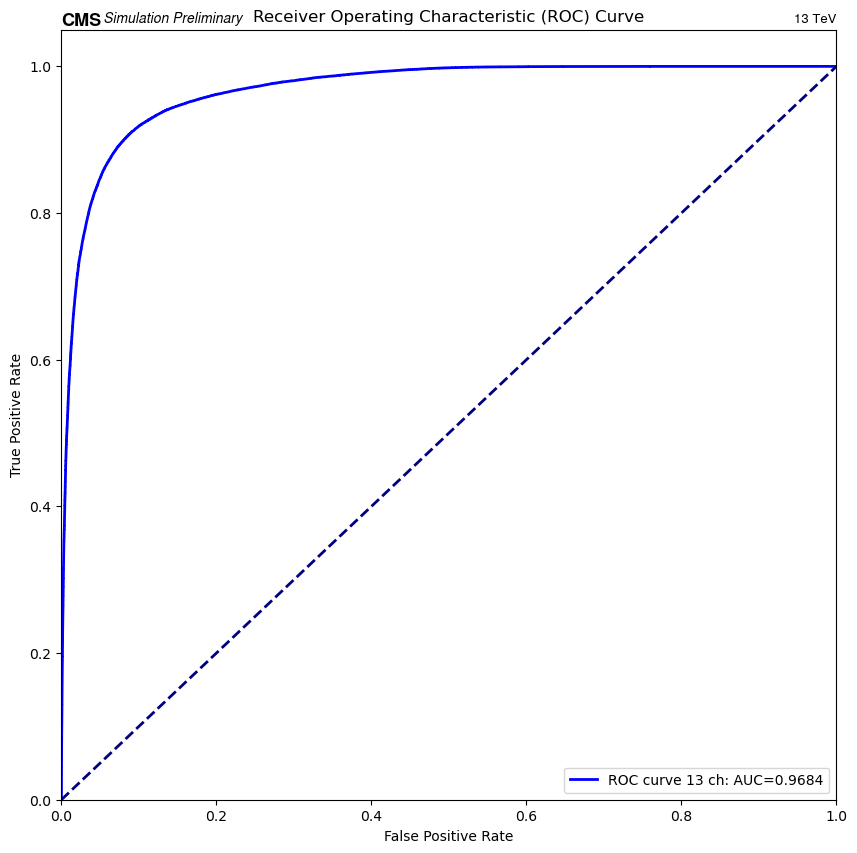

In [7]:
roc_curve(files1[-1])

Accuracy: 89.84%
Precision: 92.17%
Recall: 87.24%
F1 Score: 89.64%
Confusion Matrix:
[[392855  31948]
 [ 55026 376235]]


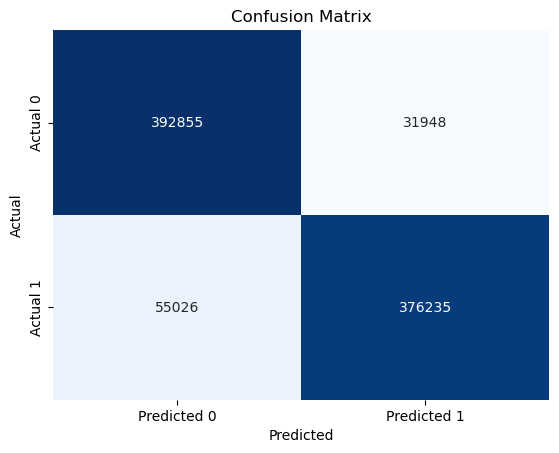

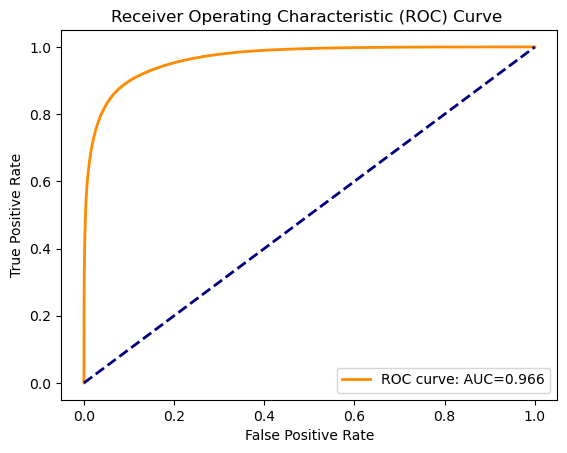

In [19]:

# Example true and predicted values
with h5py.File(files1[0], 'r') as file1:
        fpr = np.squeeze(file1['fpr'][()])  
        tpr = np.squeeze(file1['tpr'][()])
        y_pred = np.squeeze(file1['y_pred'][()])
        y_true = np.squeeze(file1['y_truth'][()])
y_pred = np.squeeze(np.array([1 if true > 0.5 else 0 for true in y_pred]))


        
#Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Calculate precision
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2%}")

# Calculate recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2%}")

# Calculate F1 score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2%}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
# Calculate ROC-AUC score

# Plot ROC curve
# fpr, tpr, _ = roc_curve(y_true, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve: AUC={np.round(auc(fpr, tpr),3)}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve ')
plt.legend(loc="lower right")
plt.show()


Accuracy: 90.76%
Precision: 89.77%
Recall: 92.16%
F1 Score: 90.95%
Confusion Matrix:
[[379346  45315]
 [ 33820 397583]]


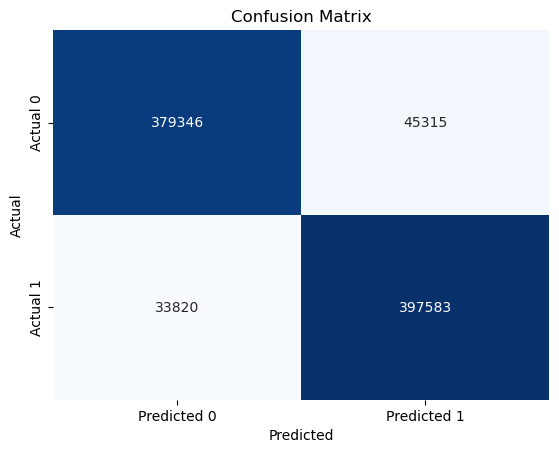

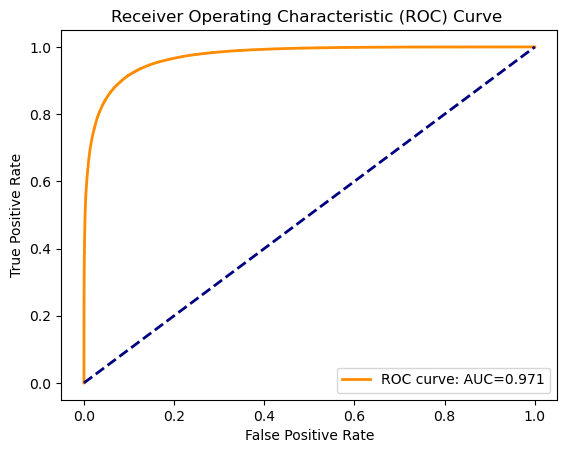

In [20]:
# Example true and predicted values
with h5py.File(files2[0], 'r') as file1:
        fpr = np.squeeze(file1['fpr'][()])  
        tpr = np.squeeze(file1['tpr'][()])
        y_pred = np.squeeze(file1['y_pred'][()])
        y_true = np.squeeze(file1['y_truth'][()])
y_pred = np.squeeze(np.array([1 if true > 0.5 else 0 for true in y_pred]))


        
#Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Calculate precision
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2%}")

# Calculate recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2%}")

# Calculate F1 score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2%}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
# Calculate ROC-AUC score

# Plot ROC curve
# fpr, tpr, _ = roc_curve(y_true, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve: AUC={np.round(auc(fpr, tpr),3)}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve ')
plt.legend(loc="lower right")
plt.show()


In [23]:
len(y_true[y_true==1])

431403

In [24]:
len(y_true[y_true==0])

424661